In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import Xception, preprocess_input
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.layers import Dense,Flatten, Input, Dropout

In [ ]:
data_dir='/content/drive/MyDrive/PR_thesis/dataset'
train_path='/content/drive/MyDrive/PR_thesis/dataset/train'
val_path='/content/drive/MyDrive/PR_thesis/dataset/valid'

In [ ]:
img_height,img_width=224,224
batch_size=100

In [ ]:
BATCH_SIZE = 100
EPOCHS = 5
LEARNING_RATE = 0.001
IMAGE_SIZE = (224, 224)
NUM_CLASSES = 2

In [ ]:
# Define the input shape
input_shape = IMAGE_SIZE + (3,)

# Load Xception model
xception = Xception(input_shape=input_shape, weights='imagenet', include_top=False)

# Define our complete models
model = Sequential()
model.add(Input(shape=input_shape))
model.add(xception)
model.add(Flatten())
model.add(Dropout(0.8))
model.add(Dropout(0.8))
model.add(Dropout(0.8))
model.add(Dense(2,activation='softmax'))
model.summary()

# set base model trainable to false
for layer in xception.layers[:-1]:
    layer.trainable = False

83683744/83683744 [==============================] - 5s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dropout (Dropout)           (None, 100352)            0         
                                                                 
 dropout_1 (Dropout)         (None, 100352)            0         
                                                                 
 dropout_2 (Dropout)         (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 2)                 200706    
                                                         

In [ ]:
# Set up data generators for training and validation data
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,

)

valid_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/PR_thesis/dataset/train',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

valid_generator = valid_datagen.flow_from_directory(
    '/content/drive/MyDrive/PR_thesis/dataset/valid',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

Found 2000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
model.compile(optimizer=Adagrad(lr=LEARNING_RATE), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
r = model.fit(train_generator, validation_data=valid_generator, epochs=EPOCHS)

Epoch 1/5
20/20 [==============================] - 670s 33s/step - loss: 1.5722 - accuracy: 0.6420 - val_loss: 0.1393 - val_accuracy: 0.9700
Epoch 2/5
20/20 [==============================] - 10s 474ms/step - loss: 0.8959 - accuracy: 0.7750 - val_loss: 0.0761 - val_accuracy: 0.9750
Epoch 3/5
20/20 [==============================] - 10s 475ms/step - loss: 0.5756 - accuracy: 0.8420 - val_loss: 0.0647 - val_accuracy: 0.9750
Epoch 4/5
20/20 [==============================] - 10s 469ms/step - loss: 0.5066 - accuracy: 0.8675 - val_loss: 0.0594 - val_accuracy: 0.9750
Epoch 5/5
20/20 [==============================] - 10s 494ms/step - loss: 0.4603 - accuracy: 0.8735 - val_loss: 0.0553 - val_accuracy: 0.9750


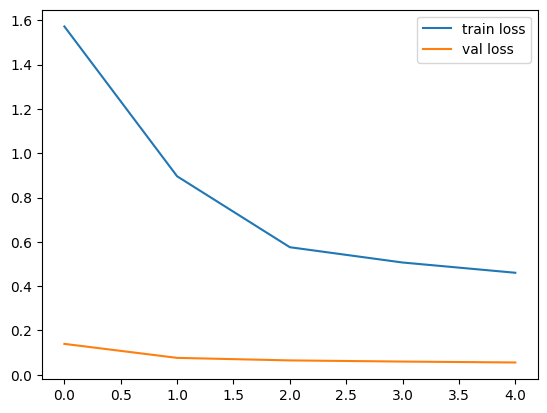

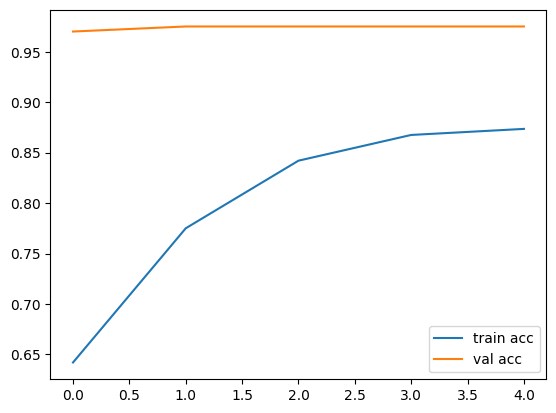

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from mlxtend.plotting import plot_confusion_matrix
import seaborn as sns
import pandas as pd

# Get predicted classes for the validation set
prediction = model.predict(valid_generator)
pred = np.argmax(prediction, axis=1)

# Get the actual classes for the validation set
y_true = valid_generator.classes

class_names = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
class_names = np.array([key.title() for key, value in class_names])
class_names

# Generate confusion matrix
cm = confusion_matrix(y_true, pred)
print(cm)

# Print classification report
report = classification_report(y_true, pred, target_names=class_names)
print(report)

2/2 [==============================] - 2s 489ms/step
[[100   0]
 [  5  95]]
              precision    recall  f1-score   support

       Crack       0.95      1.00      0.98       100
   Non Crack       1.00      0.95      0.97       100

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200



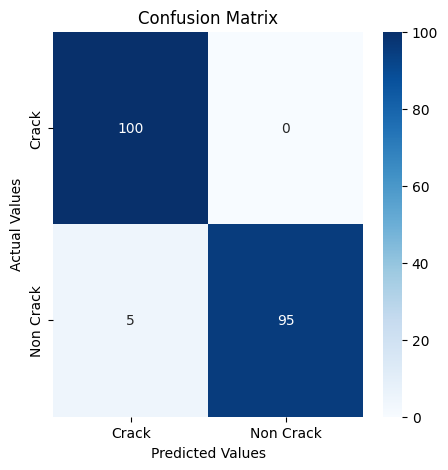

Accuracy: 97.50%


In [ ]:
# Create pandas dataframe for confusion matrix
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

# Plot confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm_df, annot=True,cmap='Blues', fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# Print accuracy score
accuracy = accuracy_score(y_true, pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))